In [1]:
import torch

torch.__version__
torch.cuda.is_available()

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cuda device


In [2]:
torch.rand(10).to(device)

tensor([0.8553, 0.9003, 0.3502, 0.3145, 0.6031, 0.3060, 0.2121, 0.4251, 0.5222,
        0.6029], device='cuda:0')

In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import datasets

In [8]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,), std=(1.0,))])

In [9]:
trainset = datasets.MNIST(root='D:\Downloads',
                          train=True, download=True,
                          transform=mnist_transform)

testset = datasets.MNIST(root='D:\Downloads',
                         train=False, download=True,
                         transform=mnist_transform)


In [10]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

In [11]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [12]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [1]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8,4))
rows, cols = 2, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1, )).item()
    #print(sample_idx)
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

NameError: name 'torch' is not defined

<Figure size 576x288 with 0 Axes>

In [2]:
import torch.nn as nn 

In [3]:
input = torch.randn(128, 20)
print(input)

m = nn.Linear(20, 30)
print(m)

output = m(input)
print(output)
print(output.size())

NameError: name 'torch' is not defined

In [4]:
input = torch.randn(20, 16, 50, 100)
print(input.size())

NameError: name 'torch' is not defined

In [48]:
m = nn.Conv2d(16, 33, 3, stride=2)
m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2))
m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2), dilation=(3,1))

print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [49]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


In [50]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [52]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [54]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [55]:
weight = weight.detach()

In [56]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

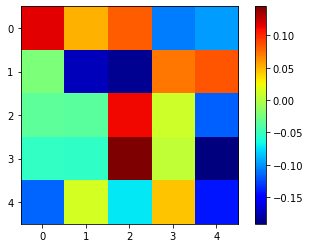

In [59]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [60]:
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [64]:
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.size())

output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

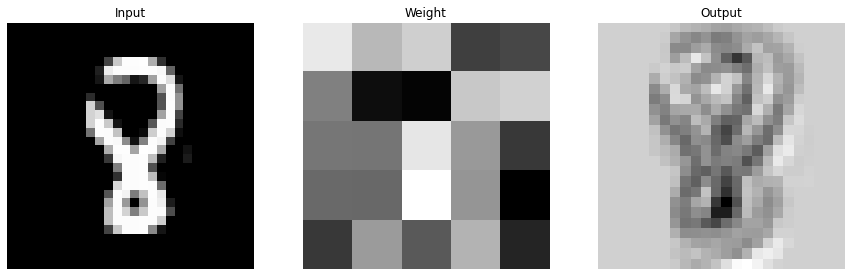

In [74]:
plt.figure(figsize=(15, 30))

plt.subplot(131)
plt.title("Input")
plt.axis('off')
plt.imshow(input_image, 'gray')

plt.subplot(132)
plt.title("Weight")
plt.axis('off')
plt.imshow(weight[0, 0, :, :], 'gray')

plt.subplot(133)
plt.title("Output")
plt.axis('off')
plt.imshow(output_arr[0, 0, :, :], 'gray')

plt.show()


In [75]:
import torch.nn.functional as F

pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

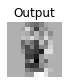

In [82]:
plt.figure(figsize=(1, 1))
pool_arr = pool.numpy()

plt.title("Output")
plt.axis('off')
plt.imshow(pool_arr[0, 0, :, :], 'gray')

plt.show()

In [83]:
flatten = input_image.view(1, 28 * 28)
flatten.shape

torch.Size([1, 784])

In [84]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [85]:
lin

tensor([[-0.0712, -0.0350,  0.2213,  0.4367,  0.3490,  0.3082, -0.0371, -0.0257,
          0.0903, -0.4546]], grad_fn=<AddmmBackward0>)

In [91]:
with torch.no_grad():
    flatten = input_image.view(1, 28 * 28)
    lin = nn.Linear(784, 10)(flatten)

    softmax = F.softmax(lin, dim=1)

softmax

tensor([[0.1007, 0.0689, 0.1456, 0.0959, 0.0852, 0.0775, 0.1784, 0.0895, 0.0786,
         0.0797]])

In [94]:
import numpy as np

np.sum(softmax.numpy())

1.0

In [99]:
inputs = torch.randn(4, 3, 28, 28)

inputs.shape

torch.Size([4, 3, 28, 28])

In [100]:
layer = nn.Conv2d(3, 20, 5, 1)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

In [ ]:
class Model(nn.Module):
    def __init__(self, input):
        

In [101]:
import torchmetrics

In [103]:
preds = torch.randn(10, 5).softmax(dim=-1)
target = torch.randint(5, (10, ))

print(preds, target)

acc = torchmetrics.functional.accuracy(preds, target)
print(acc) 

tensor([[0.1700, 0.3592, 0.4135, 0.0172, 0.0401],
        [0.2706, 0.1551, 0.4427, 0.0826, 0.0490],
        [0.2425, 0.0345, 0.2813, 0.1016, 0.3400],
        [0.5576, 0.1735, 0.1954, 0.0134, 0.0601],
        [0.1182, 0.2422, 0.4154, 0.1717, 0.0524],
        [0.2040, 0.2427, 0.0692, 0.4190, 0.0651],
        [0.0883, 0.0385, 0.3453, 0.0753, 0.4526],
        [0.0684, 0.1247, 0.2816, 0.3384, 0.1868],
        [0.0637, 0.3627, 0.1741, 0.1283, 0.2713],
        [0.0629, 0.3606, 0.1009, 0.1803, 0.2953]]) tensor([3, 2, 4, 1, 0, 1, 4, 3, 2, 1])
tensor(0.5000)


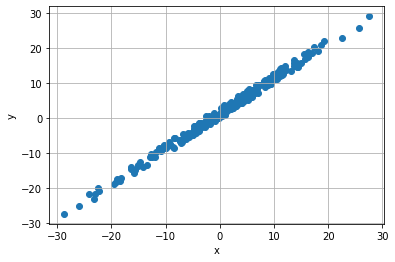

In [191]:
X = torch.randn(200, 1) * 10
y = X + 3 * torch.rand(200, 1)

plt.scatter(X.numpy(), y.numpy())

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [192]:
from turtle import forward


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.Linear = nn.Linear(1, 1)
        
    def forward(self, x):
         pred = self.Linear(x)
         return pred

In [193]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (Linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[0.5344]], requires_grad=True), Parameter containing:
tensor([0.4716], requires_grad=True)]


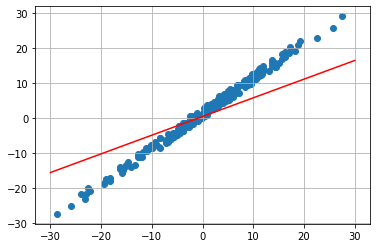

In [194]:
w, b = model.parameters()

w1, b1 = w[0][0].item(), b[0].item()

x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()
plt.show()

In [195]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

In [196]:
epochs = 100
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    loss.backward()
    
    optimizer.step()

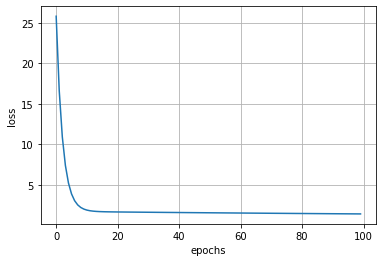

In [197]:
plt.plot(range(epochs), losses)

plt.ylabel('loss')
plt.xlabel('epochs')

plt.grid()
plt.show()

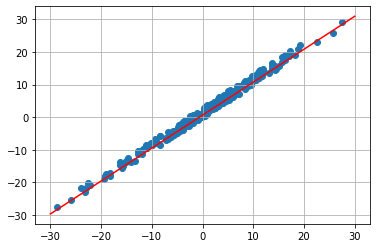

In [198]:
w1, b1 = w[0][0].item(), b[0].item()

x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()
plt.show()

In [204]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, ))])


In [213]:
trainset = datasets.FashionMNIST(root='/Users/bradjeon/Downloads/',
                                train=True, download=True,
                                transform=transform)
testset = datasets.FashionMNIST(root='/Users/bradjeon/Downloads/',
                                train=False, download=True,
                                transform=transform)

100.0%


Extracting /Users/bradjeon/Downloads/FashionMNIST/raw/train-images-idx3-ubyte.gz to /Users/bradjeon/Downloads/FashionMNIST/raw



100.0%


Extracting /Users/bradjeon/Downloads/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /Users/bradjeon/Downloads/FashionMNIST/raw



100.0%


Extracting /Users/bradjeon/Downloads/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /Users/bradjeon/Downloads/FashionMNIST/raw



100.0%

Extracting /Users/bradjeon/Downloads/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/bradjeon/Downloads/FashionMNIST/raw



In [214]:
train_loader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)


In [217]:
images, labels = next(iter(train_loader))

images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [218]:
label_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boots'
}


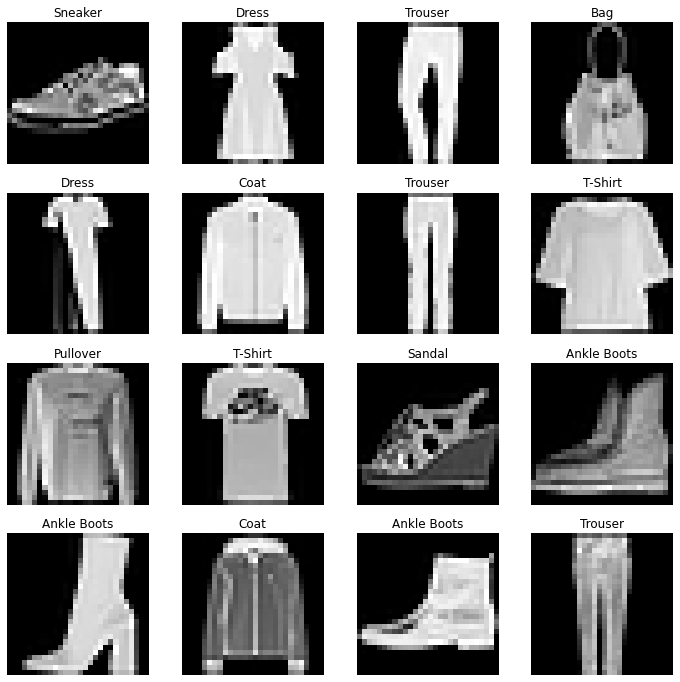

In [220]:
figure = plt.figure(figsize=(12, 12))
cols, rows = 4, 4

for i in range(1, (cols * rows + 1)):
    image = images[i].squeeze()
    label_idx = labels[i].item()
    
    label = label_map[label_idx]
    
    figure.add_subplot(rows, cols, i)
    plt.axis('off')
    plt.title(label)
    plt.imshow(image, cmap='gray')
    
plt.show()

In [221]:
from torch import conv2d


class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
            
        return num_features

net = NeuralNet()

print(net)    


NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [222]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [224]:
total_batch = len(train_loader)
print(total_batch)

469


In [226]:
for epoch in range(10):
    running_loss = 0.0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() 
        
        running_loss += loss.item()
        
        if i % 100 == 99:
            print('Epoch: {}, Iter: {}, Loss: {}'.format(epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
             

Epoch: 1, Iter: 100, Loss: 0.11484401845932007
Epoch: 1, Iter: 200, Loss: 0.11448301434516907
Epoch: 1, Iter: 300, Loss: 0.11389212203025818
Epoch: 1, Iter: 400, Loss: 0.11288253009319306
Epoch: 2, Iter: 100, Loss: 0.10656683850288391
Epoch: 2, Iter: 200, Loss: 0.0881454701423645
Epoch: 2, Iter: 300, Loss: 0.06039177882671356
Epoch: 2, Iter: 400, Loss: 0.047546082377433775
Epoch: 3, Iter: 100, Loss: 0.03979849475622177
Epoch: 3, Iter: 200, Loss: 0.03719893315434456
Epoch: 3, Iter: 300, Loss: 0.035891830533742904
Epoch: 3, Iter: 400, Loss: 0.03377855235338211
Epoch: 4, Iter: 100, Loss: 0.033098197132349017
Epoch: 4, Iter: 200, Loss: 0.03176351945102215
Epoch: 4, Iter: 300, Loss: 0.031531992107629775
Epoch: 4, Iter: 400, Loss: 0.031189511775970458
Epoch: 5, Iter: 100, Loss: 0.029843755036592482
Epoch: 5, Iter: 200, Loss: 0.03004120184481144
Epoch: 5, Iter: 300, Loss: 0.029181318074464797
Epoch: 5, Iter: 400, Loss: 0.028503970891237258
Epoch: 6, Iter: 100, Loss: 0.028274727553129195
Epoch